# Superoperator Method

This notebook implements and tests some of the superoperator formalism.

In [1]:
from transmon_code.superoperators import *
from transmon_code.helpers import *
from qutip import *
from transmon_code.simulate import *
from transmon_code.transmon import Transmon
import numpy as np
import pickle

In [2]:
# setup the transmon
tr = Transmon(n_levels=8, initial_state=0, Ω=5000, α=-100, RWA=True, dt=1/1000)
tr.X90_args = {'A': 7.449877548484732, 'Γ': 0.5024320350942441, 'ω': tr.Ω, 'A_DRAG': -0.0034947574297965116}

# set up the idealised PTM

PTM = PTMs(tr.n_levels)
X90_PTM_ideal = PTM.ideal_PTM("X90")

In [4]:
# learn the X90 PTM

X90_PTM = PTM.learn_X90_PTM(tr)

Max norm:
1.0001672666273131
Max norm:
1.0006363989786398
Max norm:
1.0001002864512039
Max norm:
1.001015937104976
Max norm:
1.000427192607113
Max norm:
1.0003744165488881
Max norm:
1.0005927196199311
Max norm:
1.0001299514332032
Max norm:
1.0001673001082187
Max norm:
1.000636395506776
Max norm:
1.0001002991004129
Max norm:
1.0010159359848092
Max norm:
1.0004271958426074
Max norm:
1.0003744063396574
Max norm:
1.000592730034661
Max norm:
1.0001284607788494


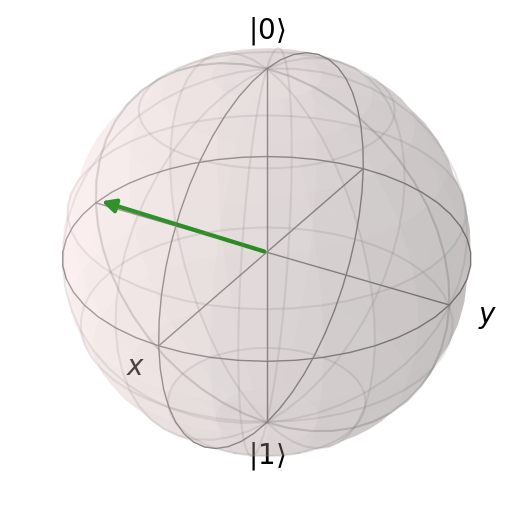

In [6]:
init = basis(8,0)
r = PTM.apply_PTM(X90_PTM, init)
plot_bloch(r)

In [7]:
# save everything
with open("transmon_PTMs", "wb") as f:
    pickle.dump([tr, X90_PTM], f)

In [8]:
# load everything
with open("transmon_PTMs", "rb") as f:
    tr, X90_PTM = pickle.load(f)

In [21]:
# check that the PTM gives the same result as the pulse
%matplotlib qt

res_sim = simulate(tr, tr.X90_args)
res_PTM = PTM.apply_PTM(X90_PTM, tr.ψ0)
res_PTM_ideal = PTM.apply_PTM(X90_PTM_ideal, tr.ψ0)

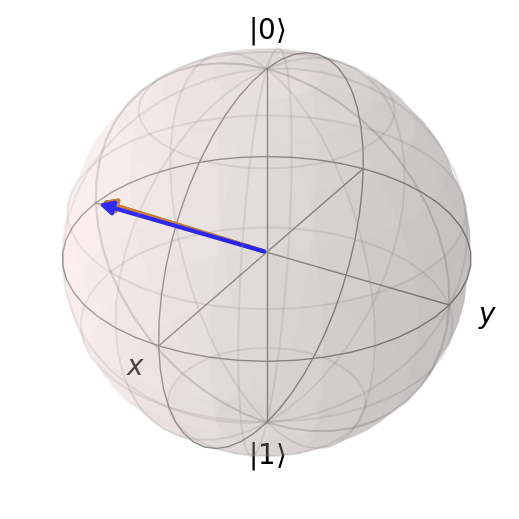

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [30]:
plot_bloch([res_sim[-1], res_PTM, res_PTM_ideal])
fidelity(truncate(res_sim[-1]), truncate(res_PTM.unit()))
disp(truncate(ket2dm(res_sim[-1])))
disp(truncate(res_PTM.unit()))
disp(X90_PTM)

In [ ]:
# check a single gate runs as expected

gate = "Y90"
g = U(gate_angles[gate])

# via simulation
print("Performing simulation...")
res_sim, _ = simulate_circuit(tr, g, plot=False)

# via ideal PTM
print("Calculating via PTMs...")
gate_PTM = PTM.ideal_PTM(gate)
res_PTM1 = PTM.apply_PTM(gate_PTM, tr.ψ0)

# via decomposition
circ_PTM = PTM.circuit_PTM(gate, X90_PTM)
res_PTMc = PTM.apply_PTM(circ_PTM, tr.ψ0)

plot_bloch(truncate([tr.ψ0, res_sim, res_PTM1, res_PTMc]))

In [ ]:
print(res_sim.norm(), res_PTMc.norm())
print(fidelity(res_sim, res_PTMc))

In [ ]:
X90_PTM

In [ ]:
# check a circuit works as expected

circ = ["X90", "Z90", "Y90", "X180"]

# via pulse simulation
res_sim, _ = simulate_circuit(tr, circ, plot=False)

# via circuit decomposition
circ_PTM = PTM.circuit_PTM(circ, X90_PTM)
res_PTM = PTM.apply_PTM(circ_PTM, tr.ψ0)

plot_bloch(truncate([tr.ψ0, res_sim, res_PTM]))

In [ ]:
# calculate the error gate
error_gate = X90_PTM * PTM.ideal_PTM("X270")#.inv()
Qobj(np.eye(error_gate.dims[0][0])) - error_gate
error_gate

In [ ]:
# perform RBT
lengths = [1000]

f = PTM.RBT_PTM(tr, X90_PTM, lengths, 1)

In [ ]:
PTM.circuit_PTM(RBT_circuit(1000), X90_PTM)